In [2]:
]add PyPlot

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


    Fetching: [======================>                  Fetching: [========================================>]  100.0 %

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [4]:
using PyPlot

In [28]:
using Base.Iterators

In [5]:
N = 10

10

In [6]:
x = [(i-1)*(2pi/N) for i in 1:N]

10-element Array{Float64,1}:
 0.0
 0.6283185307179586
 1.2566370614359172
 1.8849555921538759
 2.5132741228718345
 3.141592653589793
 3.7699111843077517
 4.39822971502571
 5.026548245743669
 5.654866776461628

In [7]:
y = [(j-1)*(2pi/N) for j in 1:N]

10-element Array{Float64,1}:
 0.0
 0.6283185307179586
 1.2566370614359172
 1.8849555921538759
 2.5132741228718345
 3.141592653589793
 3.7699111843077517
 4.39822971502571
 5.026548245743669
 5.654866776461628

In [8]:
sinx = sin.(x)

10-element Array{Float64,1}:
  0.0
  0.5877852522924731
  0.9510565162951535
  0.9510565162951536
  0.5877852522924732
  1.2246467991473532e-16
 -0.587785252292473
 -0.9510565162951535
 -0.9510565162951536
 -0.5877852522924734

In [9]:
cosy = cos.(y)

10-element Array{Float64,1}:
  1.0
  0.8090169943749475
  0.30901699437494745
 -0.30901699437494734
 -0.8090169943749473
 -1.0
 -0.8090169943749475
 -0.30901699437494756
  0.30901699437494723
  0.8090169943749473

In [40]:
xvec=range(0,N,length=N)

0.0:1.1111111111111112:10.0

In [42]:
yvec=range(0,N,length=N)

0.0:1.1111111111111112:10.0

In [49]:
xy= [x*y for x in xvec, y in yvec]

10×10 Array{Float64,2}:
 0.0   0.0       0.0       0.0       0.0      …   0.0       0.0        0.0
 0.0   1.23457   2.46914   3.7037    4.93827      8.64198   9.87654   11.1111
 0.0   2.46914   4.93827   7.40741   9.87654     17.284    19.7531    22.2222
 0.0   3.7037    7.40741  11.1111   14.8148      25.9259   29.6296    33.3333
 0.0   4.93827   9.87654  14.8148   19.7531      34.5679   39.5062    44.4444
 0.0   6.17284  12.3457   18.5185   24.6914   …  43.2099   49.3827    55.5556
 0.0   7.40741  14.8148   22.2222   29.6296      51.8519   59.2593    66.6667
 0.0   8.64198  17.284    25.9259   34.5679      60.4938   69.1358    77.7778
 0.0   9.87654  19.7531   29.6296   39.5062      69.1358   79.0123    88.8889
 0.0  11.1111   22.2222   33.3333   44.4444      77.7778   88.8889   100.0

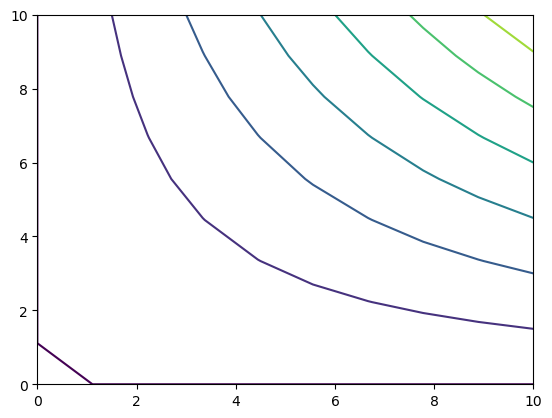

PyObject <matplotlib.contour.QuadContourSet object at 0x150034b50>

In [56]:
contour(xvec,yvec,xy)

In [50]:
xTimesy = collect(product(x2,y2)

LoadError: syntax: incomplete: premature end of input

In [12]:
function secondDerivative(f::Function,x::Number,h::Number)::Number
    return (1/h^2)*(f(x+h)-2f(x)+f(x-h))
end

secondDerivative (generic function with 1 method)

In [13]:
NegSinx=[secondDerivative(sin,x_i,2pi/N) for x_i in x]

10-element Array{Float64,1}:
  0.0
 -0.5687005759445941
 -0.9201768612999934
 -0.9201768612999937
 -0.5687005759445938
  0.0
  0.5687005759445938
  0.9201768612999937
  0.9201768612999937
  0.5687005759445943

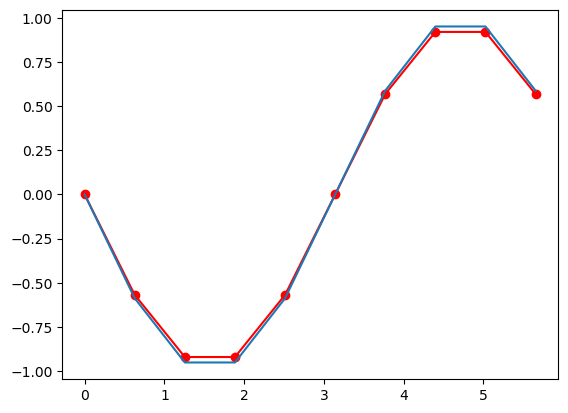

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x149c349d0>

In [14]:
plot(x,NegSinx,"r-o")
plot(x,-1*sin.(x))

In [25]:
function dudx(u::Array, i::Int, j::Int)
    # You might need to be carefull at the boundaries and use if statements 
    # so that i+1 and i-1 don't go out of bounds
    h=2pi/N
    if i==1 
        du = (u[i+1,j]-u[i,j])/h
    elseif i==N
        du = (u[i,j]-u[i-1,j])/h
    else
        du = u[i+1,j]-u[i-1,j]/(2h)
    end
    return du
end
    

dudx (generic function with 1 method)

In [16]:
function dudy(u::Array,i::Int,j::Int)
    h=2pi/N
    if j==1 
        du = (u[i,j+1]-u[i,j])/h
    elseif j==N
        du = (u[i,j]-u[i,j-1])/h
    else
        du = u[i,j+1]-u[i,j-1]/(2h)
    end    
    return du

end

dudy (generic function with 1 method)

In [57]:
U=zeros(N,N)
for i in 1:N
    for j in 1:N
    U[i,j]=dudx(xy,i,j)+ dudy(xy,i,j)
    end
    
end

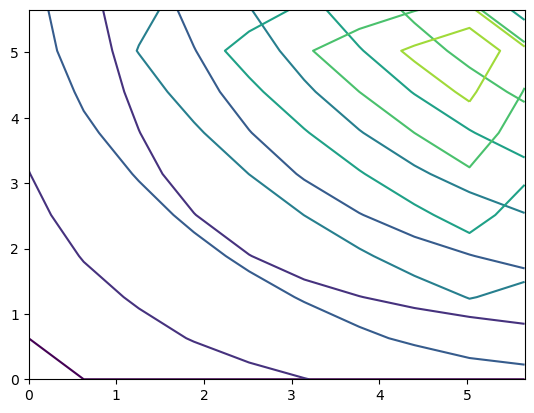

PyObject <matplotlib.contour.QuadContourSet object at 0x150381a10>

In [60]:
contour(x,y,xy)
contour(x, y,U)

In [62]:
New=zeros(N,N)
for i in 1:N
    for j in 1:N
        New[i,j]=dudx(sinx,i,j)+dudy(cosy,i,j)
    end
end

BoundsError: BoundsError: attempt to access 10-element Array{Float64,1} at index [1, 2]